<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/predicciones-de-ventas/blob/main/Ejercicio_K_MEANS_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Utilizar K-MEANS para crear diversos segmentos de los clientes**
##**2. Enviar cuaderno**

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

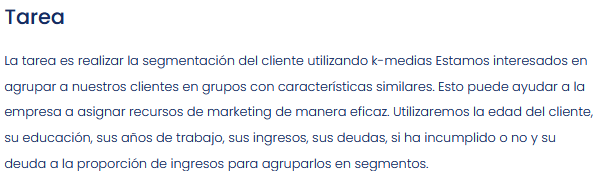

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/cust_seg.csv", index_col="Customer Id")
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [6]:
df = df[~df["Defaulted"].isna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              700 non-null    int64  
 1   Edu              700 non-null    int64  
 2   Years Employed   700 non-null    int64  
 3   Income           700 non-null    int64  
 4   Card Debt        700 non-null    float64
 5   Other Debt       700 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 49.2 KB


In [11]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


**busqueda de cluster**

Text(0, 0.5, 'inertia')

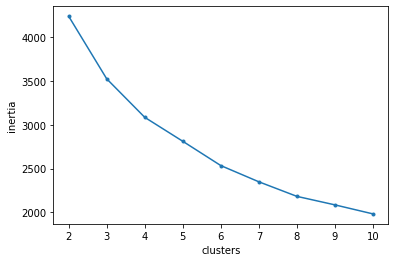

In [14]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(X_scaled)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

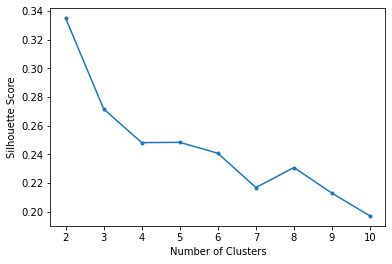

In [15]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X_scaled)
  silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [18]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [19]:
#agregar clusters al dataset
df["cluster"] = kmeans.labels_
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
845,41,1,7,43,0.694,1.198,0.0,4.4,0
847,28,2,7,34,0.359,2.021,0.0,7.0,0
848,25,4,0,18,2.802,3.210,1.0,33.4,0


In [20]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,32.804067,1.654344,6.297597,33.070240,0.867771,1.824148,0.249538,8.939741
1,1,41.855346,1.955975,15.503145,88.238994,3.886994,7.257063,0.301887,14.754717


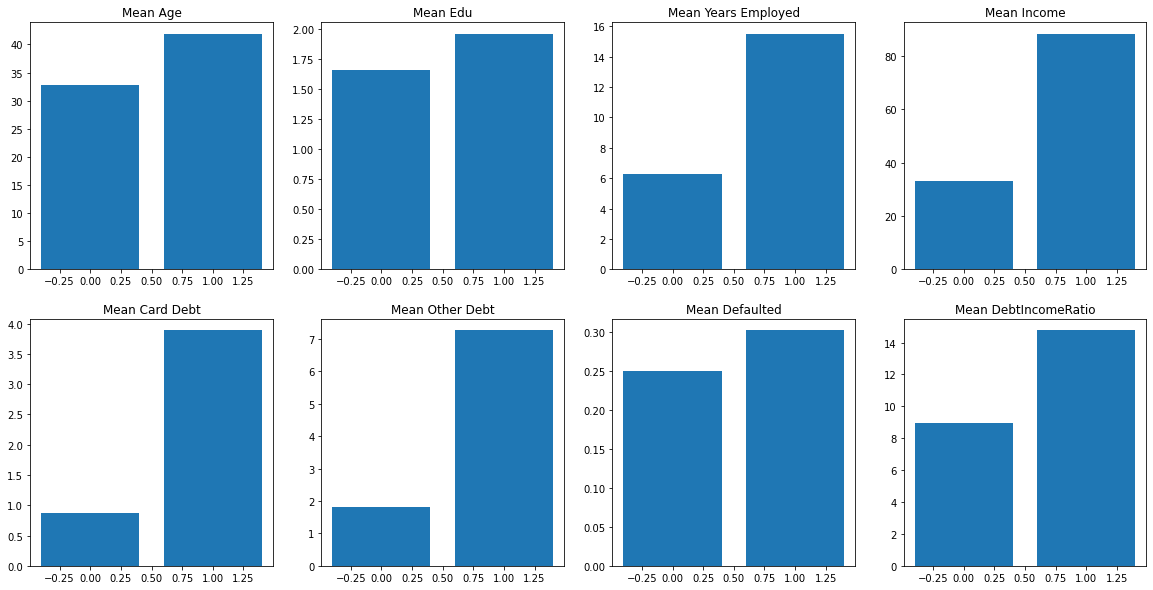

In [21]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')